# Python Hints & Tricks

**some for beginners some for advanced, some general some specific**

**Jan Steinhagen, steinhagen@physik.uni-kiel.de, April 2021**

# General Hints and Suggestions

Dear reader, this is a collection of things I have picked up working with python over the years. Bear in mind that you don't _need_ to follow them, but even the more annoying ones (make your code look good and easy to use, correct imports etc.) are worth it in the end. Let's start. Few thoughts:

* Apparently I really want people to use classes. That's why the hardest to understand is the first code chapter, "Actual Code Tips - Classes".
* If you are here for anything else start with the second code chapter, "Actual Code Tips - `*args`, `**kwargs`".
* `sudo apt install jupyter python3-fast-histogram` on your machine, hopefully that is all you need apart from `matplotlib`, `numpy` and `scipy` for this notebook. Might not be.

## Choose your Tools

* Use a shell-based text editor (like vim, emacs or comparable) and learn how to use it. This way you'll be able write and work with code on every machine, any place, everywhere. Large clunky programs like Spyder may look nice but make you lazy and rigid. Use [code folding for vim](https://vim.fandom.com/wiki/Folding), emacs will have something alike as well.
* Use ipython. Test your heart out.
* Use notebooks for suitable projects. `sudo apt install jupyter` and then `jupyter notebook`.

## Correct Imports

Do you see these: `from`, `*`? Never, and I mean **never** use them for imports! ~~`from pylab import *`~~ may look easy and convenient at first, but several things will happen:

* You will not learn about namespaces.
* You won't find out what a specific function does some months later if you google it, because you don't know if it's from numpy, scipy, or you accidently overwrote it - you don't know all the methods in their namespace by heart do you?
* Other people will neither read nor use your code. You are on your own with the mess you created.

Import like this:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy

## Sort your Code

* Sort your functions, methods and imports by name. That way you will always know where to find them ("What did that do again?!").

![Sorted and folded code in vim.](folding.png)

In very rare cases things must be imported/loaded before other things to work. Sorting everything else by name will also sensibilize you for these cases.

## Indentation and Spacing

* Always use `Tab` for line indentation in your code. That way if someone (including yourself) wants to read your code with tabwidth 1 or 8, they could!
* You can use `space`s to make your code easier to read:

In [2]:
x, y, z = np.random.random_sample((3, 20))
r     = np.linalg.norm([x, y, z], axis=0)
theta = np.arccos (z/r)
phi   = np.arctan2(y,x)

![Increase readability by spacing your code accordingly.](spacing.png)

## Comments

* **Comment your code as much as possible!** I know we are all bad at this. Trust me, I wish I had done it way more...

## Raising Errors

* Raise Errors whenever something doesn't work as intended, so you know what went wrong:

In [2]:
value = 5 # change this to any other value to raise the error
if value != 5:
    raise ValueError("Value must be 5, not {}.".format(value))

# Actual Code Tips - Classes

## Use Classes, and your Classes as Dictionaries

Classes are a powerful tool to group data and methods for the data together. Related functions which don't need a class instance to function can be added as staticmethods.

You can give your classes dictionary-like behaviour by adding the corresponding functions:

In [4]:
class AwesomeClass(object):
    static_attribute = 5  # all instances and the class itself have this
                          # attribute, see later
    def __init__(self, x, function):
        self.data = dict(x=x, y=function(x))
        return
    def __contains__(self, key):
        return key in self.data or key in self.__dict__
    def __delitem__(self, key):
        del self.data[key]
        return
    def __getitem__(self, key):
        if key in self.data:
            value = self.data[key]
        elif key in self.__dict__:
            value = self.__dict__[key]
        else:
            raise ValueError("{} is not an attribute of this class.".format(key))
        return value
    def __setitem__(self, key, value):
        self.data[key] = value
        return
    def keys(self, ):
        keys = list(self.__dict__.keys()) + list(self.data.keys())
        keys.sort()
        return keys
    def showcase_method(self, key, value):
        if key not in self:    # __contains__ in use
            self[key] = value  # __setitem__ in use
            del self[key]      # __delitem__ in use
        else:
            dummy = self[key]  # __getitem__ in use
        ca = self.static_attribute
        self.static_showcase() # static attributes and methods can also be
                               # accessed via self within a class instance
        return
    @staticmethod
    def static_showcase(): # note how a staticmethod is defined without self
                           # in the arguments
        print("This is a staticmethod. It and static_attribute=" +
              "{}".format(AwesomeClass.static_attribute) + " don't need " +
               "a class instance to work.") # edited for PDF conversion
        return

Now you can use your class within itself (from outside as well, but there are reasons not to) like a dictionary, as showcased by the showcase_method. Note how static_attribute and static_showcase don't need a class instance to function:

In [5]:
AwesomeClass.static_showcase()
AwesomeClass.static_attribute

This is a staticmethod. It and static_attribute=5 don't need a class instance to work.


5

In [6]:
ac_sin = AwesomeClass(np.linspace(0,10,101), np.sin)
ac_sin.static_showcase()
ac_sin.static_attribute

This is a staticmethod. It and static_attribute=5 don't need a class instance to work.


5

### Give your classes a .keys() method

I like to give all my classes a `.keys()` method that also sorts the keys by name, in case I forget what a specific key was called or want to check what is accessible:

In [7]:
ac_sin.keys()

['data', 'x', 'y']

Note how `'static_attribute'` is not in `self.__dict__`, but is tracked by `hasattr()`.

In [8]:
'static_attribute' in ac_sin

False

In [9]:
hasattr(ac_sin, 'static_attribute')

True

### `getter`, `setter`, `adder` and `deleter`

Now that we know how to abuse our classes as dictionaries, a word of caution:

* In my eyes, this should be used mainly inside the class itself - to make the code slicker, easier to read and write.
* If you want to allow **`getter`**, **`setter`**, **`adder`** and **`deleter`** in your class instances, it is better to write dedicated methods. This communicates the user that it is safe to do that by using the methods, and that if the class doesn't have a setter method, I _should not set anything_ from outside.

In [10]:
class AwesomeClassEnc(object): # encapsulated Awesome Class
    def __init__(self, x, function):
        self.function = function
        self.data = dict(x=x, y=function(x))
        return
    def get_x(self, ):
        return self.data['x']
    def get_y(self, ):
        return self.data['y']
    def reset_x(self, x):
        self.data['x'] = x
        self.reset_y(self.function)
        return
    def reset_y(self, function):
        self.function = function
        self.data['y'] = self.function(self.get_x())
        return

This way you encapsulate _what_ the code does from _how_ the code does it. You could now rewrite the `.reset_y(function)` method to reset the `'y'` values in a completely different way, as long as the call stays the same, your code never needs to change anywhere else. 

In [11]:
a = AwesomeClassEnc(5, np.sin)
a.get_y()

-0.9589242746631385

In [12]:
a.reset_x(4)
a.get_y()

-0.7568024953079282

## Inheritance

Just a quick example because it is a bit more difficult to grasp, but has its uses: You can inherit from other classes. It's powerful. It's not as hard as you think.

In [13]:
class Person(object):
    def __init__(self, name, age):
        self.name = name
        self.age = age
        return
    def get_age(self, ):
        return self.age
    def get_name(self, ):
        return self.name
class Child(Person):
    def __init__(self, mother, father, name, age):
        super(Child, self).__init__(name, age)   # calls the .__init__ of
                                                 # class Person
        self.mother = mother
        self.father = father
        return
    def get_name(self, which='child'):           # overwrites .get_name of
                                                 # class Person
        """
           which: 'child'/'mother'/'father'
        """
        if which == 'child':
            name = super(Child, self).get_name() # calls .get_name of
                                                 # class Person
        elif which in ('mother', 'father'):
            name = self.__dict__[which]
        else:
            raise ValueError("Valid options for which are " +
            "'child'/'mother'/'father'.")
        return name
    def get_parents(self, ):
        return self.mother, self.father

In [14]:
me = Child('Freya', 'Eckard', 'Jan', 18)
me.get_name()

'Jan'

In [15]:
me.get_age()

18

In [16]:
me.get_parents()

('Freya', 'Eckard')

Obviously this is kind of a dumb example, but that's how you do it. Note how `Child.get_name` overloads `Person.get_name`, while we didn't need to write `Child.get_age` since class `Person` already has this method and it behaves the way we want it to.

### When to use inheritance:

* You already wrote another class that does _almost_ everything you want it to do, but you want some things to be different. Inherit from it, and overload the methods you want to do something slightly different, or more. Add more methods if you need them.

## Save and Load your Class Instances

If you do lengthy calculations and such you don't want to lose your progress. You can easily save and load your class instances (including all their data etc.) with the following code below:

In [17]:
try:
   import cPickle as pickle
except:
   import pickle

class YourClass(object):
    def __init__(self, a):
        self.a = a
        return
    def save_me(self, filename):
        with open(filename, 'wb') as of: # the with statement automatically
                                         # closes open files at its end
            pickle.dump(self, of, -1)
        return
    @staticmethod
    def load_me(filename):
        with open(filename, 'rb') as of:
            instance = pickle.load(of)
        return instance

YourClass_instance = YourClass('oh yeah')
YourClass_instance.save_me('YourClass_instance.pickle')
loaded_instance = YourClass.load_me('YourClass_instance.pickle')
loaded_instance.a

'oh yeah'

Beware though that `YourClass` and everything used in it must be imported in the correct namespace to load the class instance. One way to do it is to add the path to `YourClass.py` to your `~/.bashrc`: `export PYTHONPATH=$PYTHONPATH:/path/to/my/class/`.

## Give your Classes a `.__path__`

This way you know where to look for them.

In [18]:
import os
class MyClass(object):
    # add the following line to your class:
    """__path__ = [os.path.dirname(os.path.abspath(__file__))]"""
    # this doesn't work here because __file__ only exists after
    # importing from a file
    def __init__(self, ):
        return

In [19]:
np.__file__

'/usr/lib/python3/dist-packages/numpy/__init__.py'

In [20]:
np.__path__

['/usr/lib/python3/dist-packages/numpy']

# Actual Code Tips - `*args`, `**kwargs`

Let's steer away from classes and get to some useful shorter tips. Forwarding, using and manipulating `*args` and `**kwargs`! Great stuff!!

* `*args` is a placeholder for any number of arguments and args is a tuple.
* `**kwargs` is a placeholder for any number of keyword arguments, and kwargs is a dictionary.

In [21]:
def print_args_kwargs(*args, **kwargs):
    print(args)
    print(kwargs)
    return
print_args_kwargs(1, 2, 3, a=4, b=5)

(1, 2, 3)
{'a': 4, 'b': 5}


That means we can do all sorts of nasty things (like setting default values and hide it from the user) to them before forwarding them to another function!

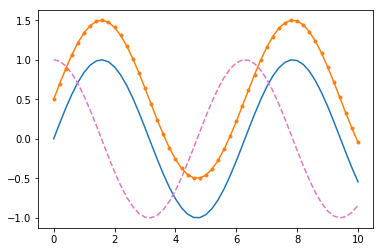

In [22]:
def my_plot(ax, x, y, *args, **kwargs):
    """
       *args, **kwargs forwarded to plt.plot.
    """
    kwargs.setdefault('color', 'C6')
    kwargs.setdefault('linestyle', 'dashed')
    ax.plot(x, y, *args, **kwargs)
    return

x = np.linspace(0, 10, 51)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
my_plot(ax, x, np.cos(x))
my_plot(ax, x, np.sin(x) + 0.5, '.', linestyle='-', color='C1')

## Decorators

Quick detour before we go more into plotting, since we already had a decorator (`@staticmethod`): You can write your own decorators that manipulate arguments and keyword arguments (or does other things) before calling the function.

Color set to a beautiful pink.


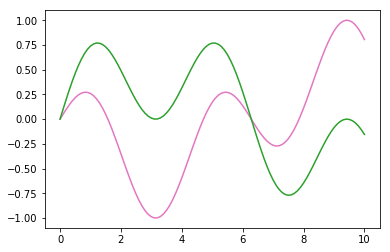

In [23]:
def plot_decorator(func):
    def function_wrapper(*args, **kwargs):
        if 'color' not in kwargs:
            kwargs.update(color='C6')
            print("Color set to a beautiful pink.")
        return func(*args, **kwargs)
    return function_wrapper

@plot_decorator
def my_other_plot(ax, x, y, *args, **kwargs):
    """
       *args, **kwargs forwarded to plt.plot.
    """
    ax.plot(x, y, *args, **kwargs)
    return

x = np.linspace(0, 10, 101)
fig, ax = plt.subplots()
my_other_plot(ax, x, np.cos(x)*np.sin(0.5*x))
my_other_plot(ax, x, np.sin(x)*np.cos(0.5*x), color='C2')

# Actual Code Tips - Plotting (aka use `matplotlib` correctly and intelligently)

## Introduction

Well, I know you probably like to do the ol' `ipython3 --pylab` thingy. Many even include an alias in their `~/.bashrc` to do it automatically. This is _"fine"_ if you want to quickly try some stuff; when using ipython to draft code or want to get to the bottom of how things work this is poison - avoid it at all cost in these cases.

Our `matplotlib` use case generally involves figures and axes. Store them in variables:

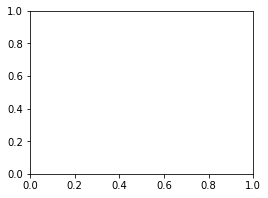

In [24]:
figsize = (4,3)
fig, ax = plt.subplots(figsize=figsize)

## Make your axes equal in 3D

What you need to do is make the shape of your ``ax3d`` quadratic on the figure canvas and set your limits to have the same length:

(-0.5, 0.5)

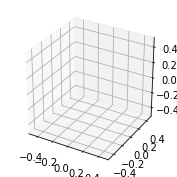

In [25]:
import mpl_toolkits.mplot3d
fig3d = plt.figure(figsize=figsize)
ax3d  = fig3d.add_subplot(1, 1, 1, projection='3d')

corners = ax3d.get_position().get_points().copy() 
size    = fig3d.get_size_inches()
ratio   = 1.*size[0]/size[1]
if size[0] > size[1]:
    height = corners[1,1] - corners[0,1]
    width  = height/ratio
    corners[0,0] = (1. - width)/2.
else:
    width  = corners[1,0] - corners[0,0]
    height = width*ratio
    corners[0,1] = (1. - height)/2.
rect = (corners[0,0], corners[0,1], width, height)
ax3d.set_position(rect)
lim  = (-0.5, 0.5)
ax3d.set_xlim(lim)
ax3d.set_ylim(lim)
ax3d.set_zlim(lim)

## Let your Plot Functions & Methods return Figures and Axes

I like to do that and it is incredibly, incredibly helpful. You can pipe your axes through multiple plot functions one after another, and change little stuff afterwards on an _if needed_-basis. Let me show you what I mean:

In [26]:
# little trick to create an axis when none is given (see "Decorators"):
def ax_decorator(func):
    def function_wrapper(*args, **kwargs):
        if 'ax' not in kwargs:
            kwargs.update(ax=plt.subplots()[1])
        return func(*args, **kwargs)
    return function_wrapper

@ax_decorator
def my_hist(x, **kwargs):
    ax = kwargs.pop('ax') # remove ax from kwargs before calling hist
    ax.hist(x, **kwargs)
    return ax.get_figure(), ax
@ax_decorator
def my_plot(x, y, **kwargs):
    ax = kwargs.pop('ax') # remove ax from kwargs before calling plot
    ax.plot(x, y, **kwargs)
    return ax.get_figure(), ax
@ax_decorator
def set_labels(xlabel='', ylabel='', title='', **kwargs):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return ax.get_figure(), ax

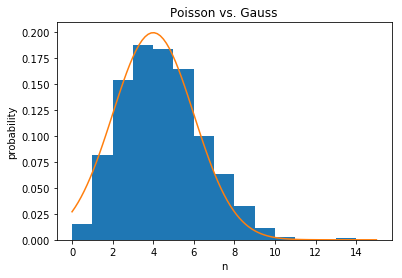

In [27]:
def gauss(x, mu, sig):
    return np.exp(-0.5*((x-mu)/sig)**2)/sig/np.sqrt(2*np.pi)
x  = np.linspace(0,15,101)
mu = 4
fig, ax = my_hist(np.random.poisson(mu, 1000), range=(0, 15), bins=15, density=True)
fig, ax = my_plot(x, gauss(x, mu, np.sqrt(mu)), ax=ax)
fig, ax = set_labels('n', 'probability', 'Poisson vs. Gauss', ax=ax)

Now again this might not look like much yet but trust me, once your plot routines explode you are going to love it.


## Use GridSpec for Plots with multiple Axes

Man if I could turn back time and discover this some years earlier... RIP ~~`plt.subplots(n,m)`~~. Say you want a 3x3 grid of axes. Say you want to have four axes on them; one 1x1, one 2x1, one 1x2 and one 2x2. Let's do it:

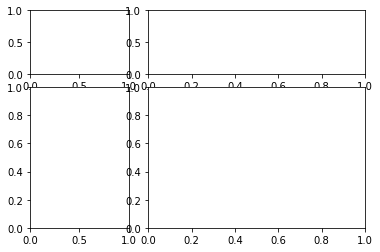

In [28]:
gs = matplotlib.gridspec.GridSpec(3, 3) # matplotlib.pyplot must also be imported
                                        # for this to work, for some weird reason
fig = plt.figure()
axes = []
axes.append(fig.add_subplot(gs[0 ,0 ]))
axes.append(fig.add_subplot(gs[0 ,1:]))
axes.append(fig.add_subplot(gs[1:,0 ]))
axes.append(fig.add_subplot(gs[1:,1:]))

Now let's assume you want to get rid of the white spaces between them axes.

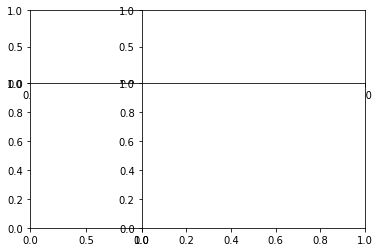

In [29]:
gs = matplotlib.gridspec.GridSpec(3, 3)
fig = plt.figure()
axes = []
axes.append(fig.add_subplot(gs[0 ,0 ]))
axes.append(fig.add_subplot(gs[0 ,1:]))
axes.append(fig.add_subplot(gs[1:,0 ]))
axes.append(fig.add_subplot(gs[1:,1:]))
# ------------ NEW from here ------------
#     (matplotlib inline backend BS)
gs.update(wspace=0, hspace=0)

Now say you think "Oh well, I would love to have an axis below all of this, but extending a bit more to the left and right."

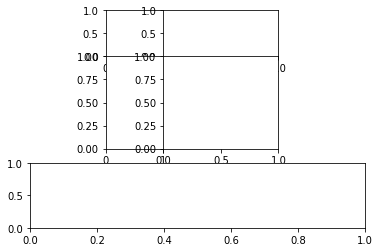

In [30]:
gs = matplotlib.gridspec.GridSpec(3, 3)
fig = plt.figure()
axes = []
axes.append(fig.add_subplot(gs[0 ,0 ]))
axes.append(fig.add_subplot(gs[0 ,1:]))
axes.append(fig.add_subplot(gs[1:,0 ]))
axes.append(fig.add_subplot(gs[1:,1:]))
gs.update(wspace=0, hspace=0)
# ------------ NEW from here ------------
#     (matplotlib inline backend BS)
new_gs = matplotlib.gridspec.GridSpec(1, 1)
axes.append(fig.add_subplot(new_gs[0,0]))
gs.update(left=0.3, bottom=0.4, right=0.7)
new_gs.update(top=0.35)

GridSpec allows you to easily push your axes around on the figure canvas. You can make space somewhere, add some more axes, delete others and so forth.

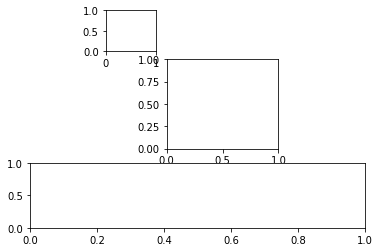

In [31]:
gs = matplotlib.gridspec.GridSpec(3, 3)
fig = plt.figure()
axes = []
axes.append(fig.add_subplot(gs[0 ,0 ]))
axes.append(fig.add_subplot(gs[0 ,1:]))
axes.append(fig.add_subplot(gs[1:,0 ]))
axes.append(fig.add_subplot(gs[1:,1:]))
gs.update(wspace=0, hspace=0)
new_gs = matplotlib.gridspec.GridSpec(1, 1)
axes.append(fig.add_subplot(new_gs[0,0]))
gs.update(left=0.3, bottom=0.4, right=0.7)
new_gs.update(top=0.35)
# ------------ NEW from here ------------
#     (matplotlib inline backend BS)
gs.update(wspace=0.2, hspace=0.2)
axes[1].remove()
axes[2].remove()

## Gain Control over your Colorbar

I.e. plot it yourself, from start to finish. Never worry about weird spacing ever again. Or stupid ranges.

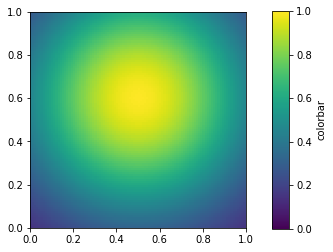

In [32]:
import copy # for copying the cmap, cmaps in matplotlib 3.4.1
            # or later have a .copy method

gs    = matplotlib.gridspec.GridSpec(1, 1) # GridSpec for axis
cb_gs = matplotlib.gridspec.GridSpec(1, 1) # GridSpec for colorbar axis
fig = plt.figure()
ax  = fig.add_subplot(gs[0,0], aspect='equal')
cax = fig.add_subplot(cb_gs[0,0])          # colorbar axis
# -- set cbar range, cmap, norm, scalar mappable --
cb_range = (0,1)
cmap = copy.copy(matplotlib.cm.get_cmap('viridis'))
cmap.set_under(alpha=0.)      # make everything below minimum invisible
norm = matplotlib.colors.Normalize(*cb_range)
sm   = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])              # not necessary in matplotlib 3.4.1 or later
# ----------------- plot colorbar -----------------
cb   = plt.colorbar(sm, cax=cax, orientation='vertical')
cax.set_ylabel('colorbar')
# ---------------- set cbar ticks -----------------
"""The following is unnecessary in this case. In case
   you want make changes to tick positions and labels
   you can use these templates."""
cax.get_xaxis().set_tick_params(bottom=False, top=False, \
                                labelbottom=False, labeltop=False)
cax.get_yaxis().set_tick_params(left=False, right=True, \
                                labelleft=False, labelright=True)
# ---------------- plot pcolormesh ----------------
def gauss_2d(x, y, mu, sigma):
    """mu must be 2d coordinates. normalization screwed."""
    r = ((x - mu[0])**2 + (y - mu[1])**2)**0.5
    return gauss(r, 0, sigma)
X, Y = np.meshgrid(np.linspace(0,1,101), np.linspace(0,1,101))
ax.pcolormesh(X, Y, gauss_2d(X, Y, (0.5, 0.6), 0.4), cmap=cmap, \
              vmin=cb_range[0], vmax=cb_range[1], shading='auto')
# --------------- adjust GridSpecs ----------------
gs.update(left=0.2, right=0.7)
cb_gs.update(left=0.76, right=0.8)

## Get rid of white Space when saving

With the keyword `bbox_inches='tight'`. I prefer to save my colormesh plots as `.png` with high DPI because most PDF viewers screw up and show white stripes at some of the mesh borders.

In [33]:
fig.savefig('cbar_plot_tight.png' , dpi=600, bbox_inches='tight') # save as .png
fig.savefig('cbar_plot_normal.pdf', dpi=300)                      # save as .pdf

## Use `latex` for your Labels

Text(0.5, 0, 'velocity $\\mathit{v} \\ / \\left(\\si{\\kilo\\meter\\per\\second}\\right)$')

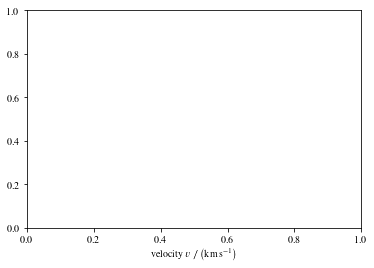

In [34]:
rc_latex_settings = {"text.usetex": True,
                     "text.latex.preamble": [r'\usepackage{xcolor}', \
                                             r'\usepackage[notextcomp]{stix}', \
                                             r'\usepackage{siunitx}'],
                     "font.family": 'serif',
                     "font.serif" : ['STIXGeneral'],
                     "mathtext.fontset": 'stix',
                     }
matplotlib.rcParams.update(rc_latex_settings)
fig, ax = plt.subplots()
ax.set_xlabel(r'velocity $\mathit{v} \ / \left(\si{\kilo\meter\per\second}\right)$')

Oh, and use the `siunitx` package in latex. It's awesome.

# Actual Code Tips - Collection of other Stuff

## Check your Versions

In [35]:
matplotlib.__version__

'3.0.2'

In [36]:
np.__version__

'1.16.2'

In [37]:
scipy.__version__

'1.1.0'

## Retrieve your Outputs

In [6]:
last_output        = _
output_before_that = __
even_before_that   = ___
output_of_line_19  = _19
print(last_output, output_before_that, \
      even_before_that, output_of_line_19)

NameError: name '_19' is not defined

## Save your History

In [39]:
%%capture
# capture suppresses output in this cell
%save my_ipython_session.py 1-100 # lines 1 to 100

There are more python magic functions (like `%paste`, `%pylab`, `%timeit` for example)... Look them up!

## What does that do again?

In [3]:
np.full?

Object `np.full` not found.


## Use fast Histograms

If you use `np.histogram` with equidistant bins for large datasets, don't define your own bins - rather use `range`, it is 4x faster on a random sample. And if you use equidistant bins you should use `sudo apt install python3-fast-histogram` instead - it is 20x times faster.

In [41]:
import fast_histogram

r    = np.random.random_sample(1000000)
bins = np.arange(0,1.1,0.1)
%timeit np.histogram(r, bins=bins)
%timeit np.histogram(r, bins=bins.shape[0]-1, range=(bins[0], bins[-1]))
%timeit fast_histogram.histogram1d(r, bins.shape[0]-1, (bins[0], bins[-1]))

10 loops, best of 5: 56.3 ms per loop
100 loops, best of 5: 11.4 ms per loop
100 loops, best of 5: 2.5 ms per loop


## How long does it take?

You've seen `%timeit` in action above, but python likes to cache wherever it can, which makes `%timeit` somewhat useless if you happen to run into such a case (it will make you think something is faster than it actually is). What you can do for eyeballing:

In [42]:
import time

t = time.time(); np.histogram(r, bins=bins); print(time.time() - t)

0.06477880477905273


## Make it faster!

I've been sleeping under a rock for some time now (aka still using python2.7) but apparently there is [Type Hinting](https://realpython.com/lessons/type-hinting/) in python3.5+ (thanks Martin!). It can make a great difference, so get at it!

## Don't use Lists as defaults, don't edit input Arrays

In [43]:
def bad_func(array, keys=['a', 'b', 'c']):
    array[array < 0] = 0
    print(keys)
    return keys
my_array = np.array([-2, -1, 0, 1, 2])
keys = bad_func(my_array)
keys.append('d')          # changing keys outside bad_func
keys = bad_func(my_array) # changes it inside as well
my_array                  # changing my_array inside bad_func
                          # changes it outside as well

['a', 'b', 'c']
['a', 'b', 'c', 'd']


array([0, 0, 0, 1, 2])

In [44]:
def good_func(array, keys=('a', 'b', 'c')):
    new_array = array.copy()
    new_array[array < 0] = 0
    print(keys)
    return keys

* **Use tuples as defaults, copy input arrays before editing!!!**

## Operator Precedence

What is evaluated first, ``is`` or ``==``? Look it up [here](https://docs.python.org/3/reference/expressions.html), ``Ctrl + F`` "operator precedence". Knowing in which order expressions are evaluated is kinda important.

## You can use any Immutable as Dictionary Key

In [45]:
d = {}
d[   ()] = 'a'
d[(1,2)] = 'b'
d[  45 ] = 'c'
d[False] = 'd'
d[True ] = 'e'
d[None ] = 'f'
d['yep'] = 'g'
d

{(): 'a', (1, 2): 'b', 45: 'c', False: 'd', True: 'e', None: 'f', 'yep': 'g'}

## If you ever need an order-preserving Dictionary:

In [46]:
import collections

d = collections.OrderedDict()

## Can I haz a Histogram with overlapping bins?

Well histograms should normally be sum-preserving, that's why there is no such thing in `numpy`. But if you ever need one for some niche reason (you could calculate running averages with it for instance) there you go:

In [47]:
def overlap_hist(a, bins, **kwargs):
    bins = np.asarray(bins)
    if len(bins.shape) != 2 or bins.shape[1] != 2: 
        raise AttributeError('Bins must be a list/array of 2-tuples.')
    histbins, ind = np.unique(bins, return_inverse=True)
    ind = ind.reshape(bins.shape)
    hist, tmp = np.histogram(a, bins=histbins, **kwargs)
    csum = np.append(0, np.cumsum(hist))
    return csum[ind[:,1]] - csum[ind[:,0]]
data = (np.random.random_sample(100)*10).astype(np.uint8)
bins = np.array([[0,5], [3,7], [5,10]])
overlap_hist(data, bins)

array([49, 49, 51])